In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json
#import geopandas as gpd

# Electric vehicles analysis
## Will EV be the choice of car for consumers in the foreseable future?


Over the last couple of years the electric vehicle market has grown to become a US$561.3bn worldwide. In the UK, the vehicle market has increased steadily after the pandemic with around now xxx electic and plug in electric vehicles now in the road and account for around %xx of overall vehicles in the road.

Manufactures have increased the number of EV models given consumer a greater choice, the number public electric charging has grown and consumers have used grants and lower running cost to offset the initial cost of electric vehicles.

As the market continues to increase we now need to analyse if the infrastructure is in place to support an increasing demand for electric chargers and the rise of cost of living specifically the cost of electricity will have an impact on consumer demand for electric vehicles.


# New vehicles registrations 
### Electric and Plug in new vehicles registration now are double of diesel vehicles

In [13]:
#Import vehicle registration data
veh_reg=pd.read_csv('data/vehicle_registration_2014Q3_2023Q2.csv')
#Check shape and given shape has 42 columns, for the purposes of visualisation I will unpivot the file
veh_reg.shape

(53195, 41)

In [14]:
#We have the reference information about the vehicles in the first 5 columns and the time information afterwwards
veh_reg.head()

,BodyType,Make,GenModel,Model,Fuel,2023Q2,2023Q1,2022Q4,2022Q3,2022Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,0,0,0,0,0,...,59,100,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,0,0,0,0,0,...,10,26,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Unpivot the file and run the info function to check if there are any null values and check data types
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915020 entries, 0 to 1915019
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   BodyType      object
 1   Make          object
 2   GenModel      object
 3   Model         object
 4   Fuel          object
 5   YearQuarter   object
 6   Registration  int64 
dtypes: int64(1), object(6)
memory usage: 102.3+ MB


In [16]:
#Checking the number of registration by body type and cars have by far the largest number of registrations 
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').groupby(['BodyType'])['Registration'].sum()

BodyType
Buses and coaches          65379
Cars                    19847035
Heavy goods vehicles      437870
Light goods vehicles     3188722
Motorcycles              1103981
Other vehicles            494821
Name: Registration, dtype: int64

In [17]:
#Make a copy of the file
cars_data=veh_reg.copy()
#Unpivot data to have the date as rows rather than columns
cars_data=pd.melt(cars_data,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration')
#Filter for only cars
cars_data=cars_data[cars_data['BodyType']=='Cars']
#Add a column for the year
cars_data['Year']=cars_data['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_data['Quarter']=cars_data['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_data.loc[cars_data['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_data.loc[cars_data['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_data.loc[cars_data['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Change name of battery electric to electric
cars_data.loc[cars_data['Fuel'].isin(['Battery electric']),'Fuel']='Electric'
#Show sample of the data
cars_data.sample(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Registration,Year,Quarter
738377,Cars,VAUXHALL,VAUXHALL INSIGNIA,INSIGNIA DESIGN NAV ECOTEC T D,Diesel,2020Q1,0,2020,Q1
1417303,Cars,NISSAN,NISSAN SILVIA,SILVIA,Petrol,2016Q4,15,2016,Q4
945569,Cars,SEAT,SEAT TOLEDO,TOLEDO SE TDI S-A,Petrol,2019Q1,0,2019,Q1
1761334,Cars,CHEVROLET,CHEVROLET KALOS,KALOS SE,Petrol,2015Q1,1,2015,Q1
1478714,Cars,SMART,SMART FORTWO,FORTWO PASSION AUTO,Petrol,2016Q3,241,2016,Q3
1597885,Cars,AUDI,AUDI Q3,Q3 S LINE NAVIGATION TDI QUAT,Diesel,2015Q4,0,2015,Q4
1770330,Cars,FORD,FORD TRANSIT,TRANSIT 120 L,Petrol,2015Q1,0,2015,Q1
508470,Cars,MERCEDES,MERCEDES C CLASS,C230 KOMPRESSOR,Petrol,2021Q1,0,2021,Q1
1130103,Cars,FORD,FORD ESCORT,ESCORT 1300 L AUTO,Petrol,2018Q1,0,2018,Q1
1662379,Cars,FORD,FORD FIESTA,FIESTA ZETEC TURBO,Petrol,2015Q3,7460,2015,Q3


In [18]:
fuel_registration=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_registration=fuel_registration[~fuel_registration['Year'].isin(['2014','2023'])]
fuel_registration['Registration']=fuel_registration['Registration']/1000

In [19]:
total_reg_year=fuel_registration.groupby(['Year'])['Registration'].sum().reset_index(['Year'])
total_reg_year.rename(columns={'Registration':'TotalRegistrations'},inplace=True)
total_reg_year

,Year,TotalRegistrations
0,2015,2661.020
1,2016,2723.774
2,2017,2564.330
3,2018,2394.042
4,2019,2346.576
5,2020,1656.403
6,2021,1677.245
7,2022,1652.128


In [20]:
years=total_reg_year['Year'].to_list()
market_share=pd.merge(fuel_registration,total_reg_year,how='left',on='Year')
market_share['MarketShare']= market_share['Registration']*100/market_share['TotalRegistrations']
market_share.head(10)

,Fuel,Year,Registration,TotalRegistrations,MarketShare
0,Diesel,2015,1284.010,2661.020,48.252550
1,Diesel,2016,1293.690,2723.774,47.496231
2,Diesel,2017,1073.535,2564.330,41.864152
3,Diesel,2018,755.625,2394.042,31.562729
4,Diesel,2019,622.089,2346.576,26.510499
5,Diesel,2020,304.443,1656.403,18.379766
6,Diesel,2021,194.692,1677.245,11.607845
7,Diesel,2022,127.902,1652.128,7.741652
8,Electric,2015,10.091,2661.020,0.379215
9,Electric,2016,10.429,2723.774,0.382888


In [21]:
# Create function to create palettes for my graphs
def custom_palette(df,colours,hue):
    hue_values=sorted(df[hue].unique())
    colours=colours
    colour_palette={}
    if abs(len(hue_values)-len(colours))>0:
        raise Exception(f'Length of colours and categories must match: Colour lenght is {len(colours)}, category length is {len (hue_values)}')
    else:
        for colour,hue in zip(colours,hue_values):
            colour_palette[hue]=colour
        return colour_palette


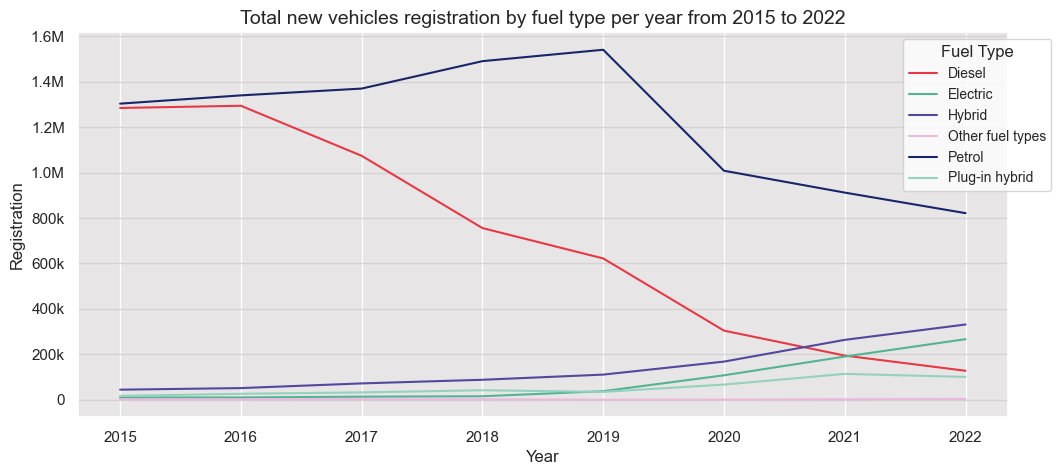

In [22]:
#Set the palette for the graphs
colours=['#E63946','#54B393','#52489C','#EBB8DD','#182568','#94d2bd']
new_palette=custom_palette(market_share,colours,hue='Fuel')

#Plot information
fig=plt.figure(figsize=(12,5))
plt.title('Total new vehicles registration by fuel type per year from 2015 to 2022',size=14);
ax=sns.lineplot(data=fuel_registration,x='Year',y='Registration',hue='Fuel',hue_order=sorted(market_share['Fuel'].unique()),
                errorbar=None,palette=new_palette)
#Set the colour 
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(0.88, 1))
#Change colour of grid lines for the y axis
ax.grid(color='lightgrey',axis='y')
y_ticks=['0','0','200k','400k','600k','800k','1.0M','1.2M','1.4M','1.6M']
ax.set_yticklabels(y_ticks);

fig.savefig('graphs/Car registrations by fuel type.png')

Electric and Plug in new vehicles registration now are double of diesel vehicles. Electric, hybrid and plug in hybrid cars accounted for around 1M new registrations, the number of registration have doubled from 2019. Even with an overall decrease of total registrations of new cars compared to 2019. Diesel vehicles new registrations have decreased considerably and now account for less than 300k down from 900k in 2019. This shows the shift of consumer behaviour where more and more customer are choosing for electric and hybrid vehicles over diesel vehicles.

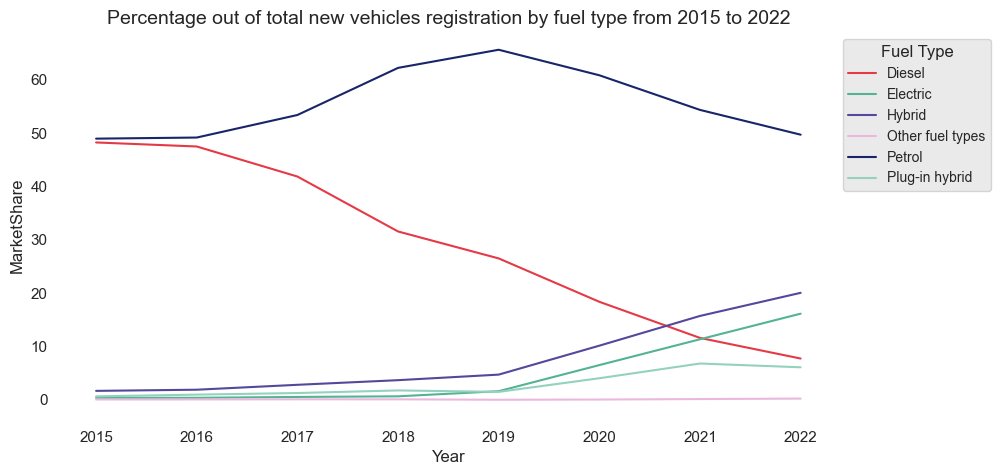

In [23]:
plt.figure(figsize=(10,5));
plt.title('Percentage out of total new vehicles registration by fuel type from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=market_share,x='Year',y='MarketShare',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))


In [24]:
#Import vehicle registration data
veh_licence=pd.read_csv('data/vehicle_licence_status_1994Q4_2023Q2.csv')
veh_licence.shape

(230440, 81)

In [25]:
#We have the reference information about the vehicles in the first 5 columns and the time information afterwwards
veh_licence.head()

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2023Q3,2023Q2,2023Q1,2022Q4,...,2003Q4,2002Q4,2001Q4,2000Q4,1999Q4,1998Q4,1997Q4,1996Q4,1995Q4,1994Q4
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,16,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,4,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,26,27,25,24,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,2,1,2,3,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,987,993,988,982,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Make a copy of the file
cars_licence=veh_licence.copy()
#Filter for only liceced vehicles
cars_licence=cars_licence[cars_licence['LicenceStatus']=='Licensed']
#Drop LicenceStatus colunm
cars_licence.drop(['LicenceStatus'],axis=1,inplace=True)
#Unpivot data to have the date as rows rather than columns
cars_licence=pd.melt(cars_licence,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Licences')
#Filter for only cars
cars_licence=cars_licence[cars_licence['BodyType']=='Cars']
#Add a column for the year
cars_licence['Year']=cars_licence['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_licence['Quarter']=cars_licence['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_licence.loc[cars_licence['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Show sample of the data
cars_licence.head(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Licences,Year,Quarter
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,2023Q3,16,2023,Q3
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,2023Q3,26,2023,Q3
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,2023Q3,987,2023,Q3
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,2023Q3,658,2023,Q3
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,2023Q3,60,2023,Q3
5,Cars,ABARTH,ABARTH 500,500,Petrol,2023Q3,3863,2023,Q3
6,Cars,ABARTH,ABARTH 500,500 C,Petrol,2023Q3,150,2023,Q3
7,Cars,ABARTH,ABARTH 500,500 C S-A,Petrol,2023Q3,376,2023,Q3
8,Cars,ABARTH,ABARTH 500,500 CUSTOM,Petrol,2023Q3,337,2023,Q3
9,Cars,ABARTH,ABARTH 500,500 CUSTOM S-A,Petrol,2023Q3,96,2023,Q3


In [27]:
fuel_licence=cars_licence.copy()
fuel_licence=fuel_licence[(fuel_licence['Year'].isin(years))&(fuel_licence['Quarter']=='Q4')]
fuel_licence=fuel_licence.groupby(['Fuel','Year'])['Licences'].sum().reset_index(['Fuel','Year'])
fuel_licence=fuel_licence[~fuel_licence['Year'].isin(['2014','2023'])]
#fuel_licence['Licences']=fuel_licence['Licences']/1000000
fuel_licence.head(10)


,Fuel,Year,Licences
0,Battery electric,2015,20472
1,Battery electric,2016,29086
2,Battery electric,2017,41222
3,Battery electric,2018,55338
4,Battery electric,2019,89581
5,Battery electric,2020,191596
6,Battery electric,2021,374597
7,Battery electric,2022,620632
8,Diesel,2015,11428664
9,Diesel,2016,12051932


ValueError: The palette dictionary is missing keys: {'Battery electric'}

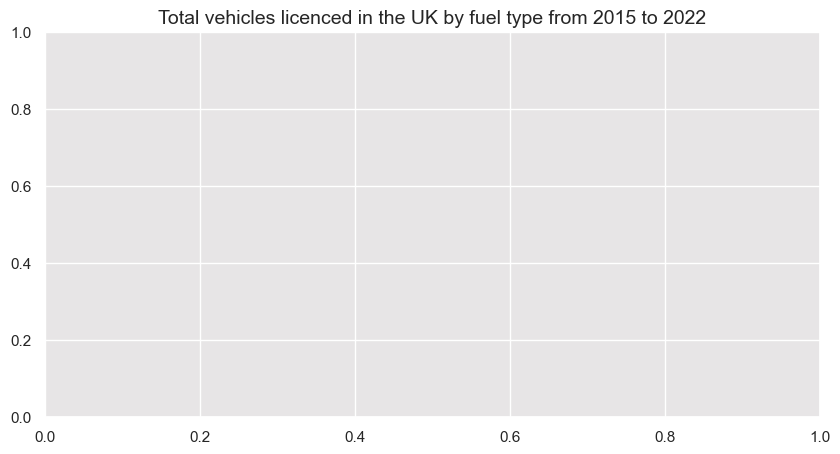

In [28]:
plt.figure(figsize=(10,5));
plt.title('Total vehicles licenced in the UK by fuel type from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=fuel_licence,x='Year',y='Licences',hue='Fuel',errorbar=None,hue_order=sorted(fuel_licence['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))

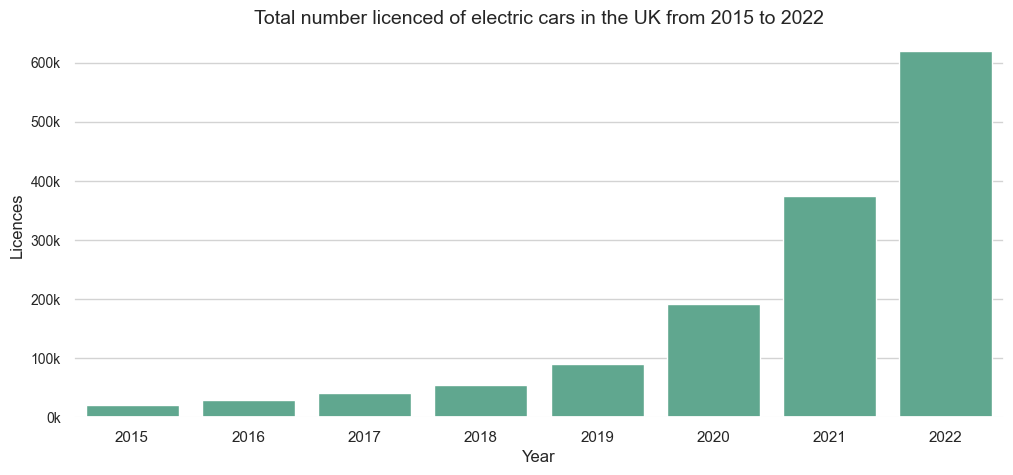

In [30]:
fig=plt.figure(figsize=(12,5));
total_electric=fuel_licence[fuel_licence['Fuel']=='Battery electric']
y_ticks=range(0,700,100)
plt.title('Total number licenced of electric cars in the UK from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
ax=sns.barplot(data=total_electric,x='Year',y='Licences',color='#54B393')
#Change colour of grid lines for the y axis
ax.grid(color='lightgrey',axis='y')
#Add % sign to the y axis labels and change fontsize
ax.set_yticklabels(list(str(i) + 'k' for i in y_ticks),fontsize=10);
fig.savefig('graphs/total number licenced of electric cars in the UK.png')
#sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))

In [31]:
str(y_ticks)

'range(0, 700, 100)'

Electric and hybrid cars still only account for around 2% of the total number of licenced cars in the UK, petrol cars still remain the main choice for UK drivers. Diesel vehicles are the most affected by the policies in the UK and we can see a clear declined from 2019 in the number of licenced vehicles.

In [32]:
veh_licence_geo=pd.read_csv('data/vehicle_licences_region.csv')
veh_licence_geo.head(10)

,ONS Code,ONS Region,ONS Upper Tier Local Authority,ONS Lower Tier Local Authority,Units,Body type,Fuel,CO2 band (g/km) [note 3],Keepership,Year of first registration [note 4],Number
0,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2012,1
1,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2015,1
2,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2016,1
3,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2017,1
4,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2018,2
5,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2019,4
6,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2020,10
7,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2021,19
8,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2022,38
9,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2023,53


In [33]:
veh_licence_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483706 entries, 0 to 483705
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   ONS Code                             483706 non-null  object
 1   ONS Region                           483706 non-null  object
 2   ONS Upper Tier Local Authority       483706 non-null  object
 3   ONS Lower Tier Local Authority       483706 non-null  object
 4   Units                                483706 non-null  object
 5   Body type                            483706 non-null  object
 6   Fuel                                 483706 non-null  object
 7   CO2 band (g/km) [note 3]             483706 non-null  object
 8   Keepership                           483706 non-null  object
 9   Year of first registration [note 4]  483706 non-null  int64 
 10  Number                               483706 non-null  object
dtypes: int64(1), object(10)
me

In [34]:
# Number column is an object and needs to be converted to integer

#Create a function to check if a particular column can be converted to integer which return error values
def int_check(df,column):
    '''
    df: A dataframe object
    Column:Integer index of the column to check if it can be converted to integer
    '''
    length=df.iloc[:,column]
    errors=[]
    for i in length:
        try:
            int(i)
        except ValueError:
            errors.append(i)
    return errors


In [35]:
#Apply the function to the numbers column
err=int_check(veh_licence_geo,10)
#Check first 10 values to see which values can cause errors, we need to remove commas from the values
print(err[0:10])


['1,013', '1,113', '1,241', '1,033', '1,159', '1,081', '1,087', '1,035', '1,286', '1,364']


In [36]:
veh_licence_geo['Number']=veh_licence_geo['Number'].replace(",","",regex=True)
#Apply the check function to the numbers column again
err=int_check(veh_licence_geo,10)
#Error list is now empty so we can proceed with to cast the column to integer
print(err)
#Cast Number column to integers
veh_licence_geo['Number']=veh_licence_geo['Number'].astype(int)

[]


In [37]:
#Copy dataframe
cars_licence_geo=veh_licence_geo.copy()
#Filter for only cars
cars_licence_geo=cars_licence_geo[cars_licence_geo['Body type']=='Cars']


In [38]:
#Create copy of dataframe
fuel_licence_geo=cars_licence_geo.copy()
#Group dataframe by fuel type and region
fuel_licence_geo=fuel_licence_geo.groupby(['ONS Region','Fuel'])['Number'].sum().reset_index(['ONS Region','Fuel'])
#Change names of battery electric, hybrid electric (combined) and plug in hybrid electric (combined)
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Battery electric','Fuel']='Electric'
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Hybrid electric (combined)','Fuel']='Hybrid'
fuel_licence_geo.loc[fuel_licence_geo['Fuel']=='Plug-in hybrid electric (combined)','Fuel']='Plug-in hybrid'
#Get the unique list of regions
regions=fuel_licence_geo['ONS Region'].unique()
#Loop to calculate the percentage of cars by fuel type for each region
for i in regions:
    total=fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Number'].sum()
    fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Percentage']=(fuel_licence_geo.loc[fuel_licence_geo['ONS Region']==i,'Number']/total)*100
#Drop other fuel types
fuel_licence_geo=fuel_licence_geo[fuel_licence_geo['Fuel']!='Other fuel types']
#Check first 10 rows of the dataframe
fuel_licence_geo.head(10)

,ONS Region,Fuel,Number,Percentage
0,East,Electric,71483,2.078138
1,East,Diesel,1129021,32.822649
2,East,Hybrid,153510,4.462809
4,East,Petrol,2027694,58.948671
5,East,Plug-in hybrid,55522,1.614123
6,East Midlands,Electric,39973,1.576816
7,East Midlands,Diesel,972507,38.362514
8,East Midlands,Hybrid,105432,4.158979
10,East Midlands,Petrol,1386939,54.710626
11,East Midlands,Plug-in hybrid,28361,1.118757


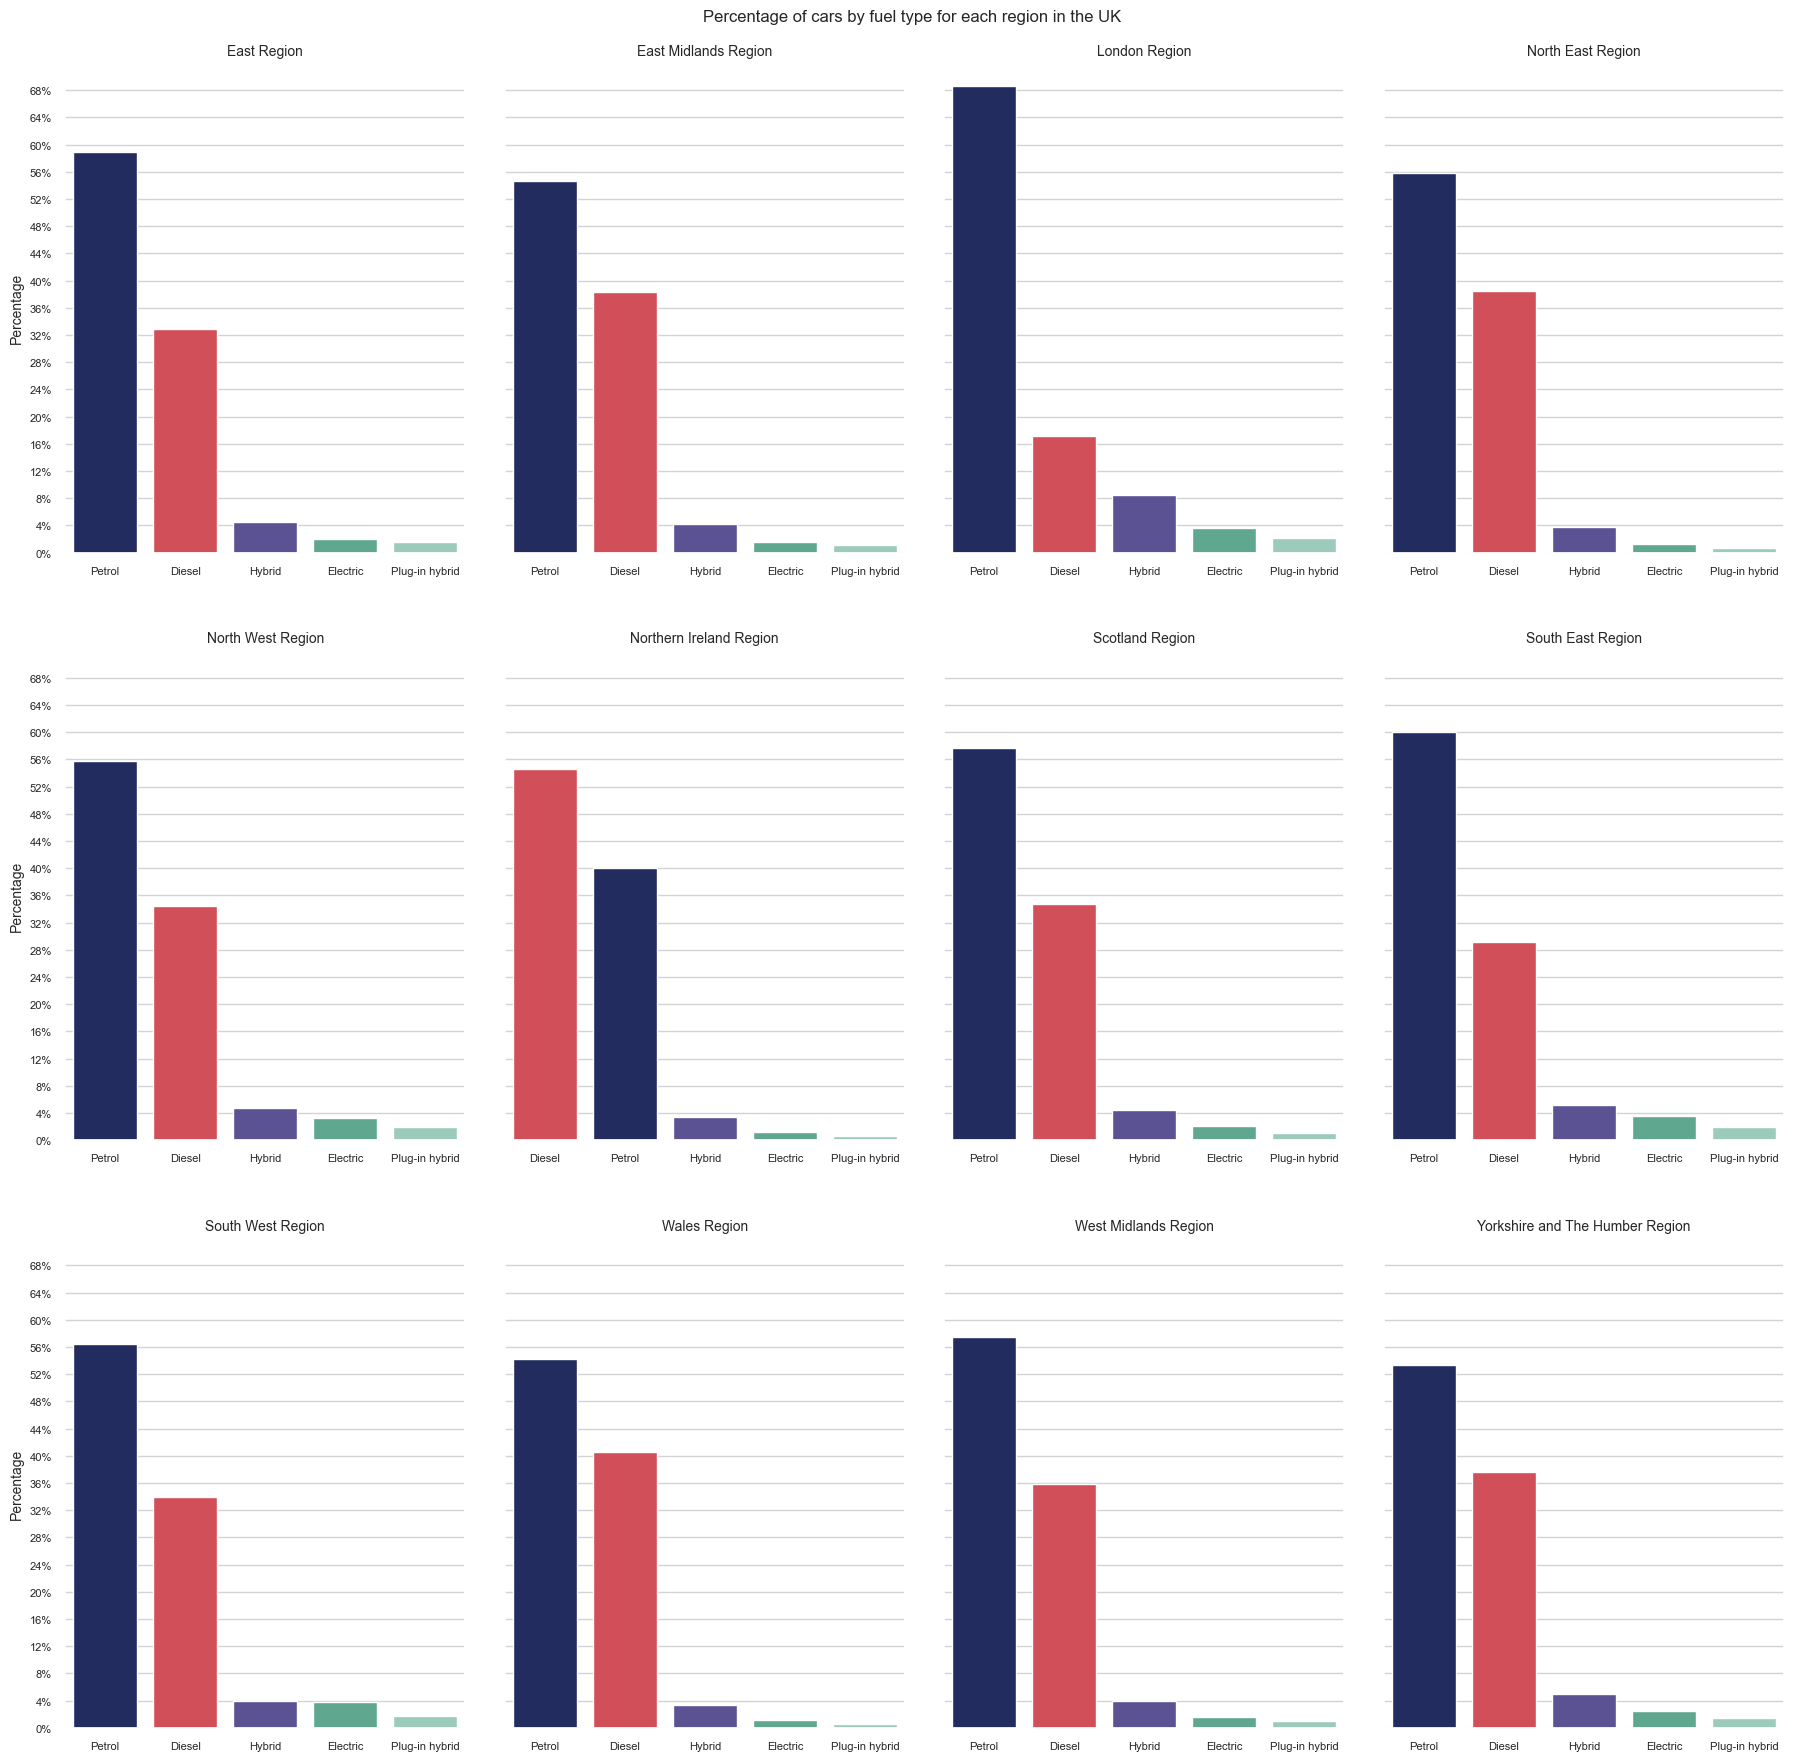

In [39]:
#Set colours of fuel categories
colours=['#E63946','#54B393','#52489C','#182568','#94d2bd']
#Use paletter function to define the colours
palette=custom_palette(fuel_licence_geo,colours,hue='Fuel')
#Get the regions to plot (categories)
regions=fuel_licence_geo['ONS Region'].unique()
#Set the steps in the y axis
y_ticks=np.arange(0, 72, 4)
#Start subplots
fig,axs=plt.subplots(3,4,figsize=(18,18),sharey=True)
#Add title
fig.suptitle('Percentage of cars by fuel type for each region in the UK',fontsize=12)
#Tight layout to make sure subplots do not overlap
fig.tight_layout()
#Adjust space between subplots and top of figure and height space between subplots
fig.subplots_adjust(top=0.95,hspace=0.2)
#Start loop to plot percentage of cars by fuel type per region in the UK
for ax,region in zip(axs.reshape([12,1]),regions):
    #Filter value for each region and sort values descending order for that region
    data=fuel_licence_geo[fuel_licence_geo['ONS Region']==region].sort_values(by='Percentage',ascending=False)
    #Plot bar chart and add paletter
    sns.barplot(data=data,x='Fuel',y='Percentage',ax=ax[0],palette=palette);
    #Change background colour of graphs
    ax[0].set_facecolor('white')
    #Change colour of grid lines for the y axis
    ax[0].grid(color='lightgrey',axis='y')
    #Add title to each plot
    ax[0].set_title(f'{region} Region',fontsize=10)
    #Change font size of x label
    ax[0].set_xticks(data['Fuel'].unique())
    ax[0].set_xticklabels(data['Fuel'].unique(),fontsize=8)
    #Remove title of x axis
    ax[0].set(xlabel=None)
    #Add label to y axis
    ax[0].set_ylabel('Percentage',fontsize=10)
    #Set y axis steps
    ax[0].set_yticks(y_ticks)
    #Add % sign to the y axis labels and change fontsize
    ax[0].set_yticklabels(list(str(i) + '%' for i in y_ticks),fontsize=8);

In [40]:
veh_licence_geo.head(10)

,ONS Code,ONS Region,ONS Upper Tier Local Authority,ONS Lower Tier Local Authority,Units,Body type,Fuel,CO2 band (g/km) [note 3],Keepership,Year of first registration [note 4],Number
0,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2012,1
1,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2015,1
2,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2016,1
3,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2017,1
4,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2018,2
5,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2019,4
6,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2020,10
7,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2021,19
8,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2022,38
9,E06000001,North East,Hartlepool,[z],Number,Cars,Battery electric,A: 0,Company,2023,53


In [ ]:
raise Exception('cells are not ruuning beyond this point')

Exception: cells are not ruuning beyond this point

In [41]:
quarter_change=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'YoY']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['YoY']=quarter_change['YoY']*100/quarter_change['Registration']
quarters=sorted(quarter_change['Year'].unique())
quarter_change=quarter_change[~quarter_change['Year'].isin(['2014','2023'])]
quarter_change=quarter_change[quarter_change['Fuel'].isin(['Battery electric','Hybrid'])]

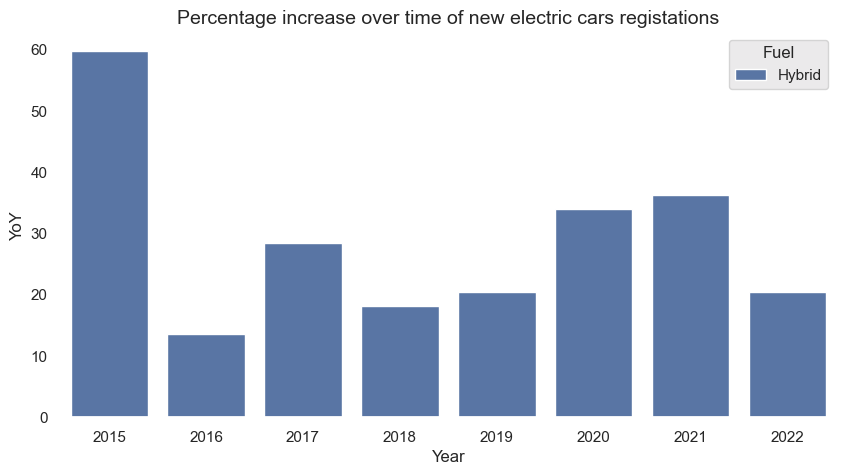

In [42]:
plt.figure(figsize=(10,5));
plt.title('Percentage increase over time of new electric cars registations',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data=quarter_change,x='Year',y='YoY',hue='Fuel')

In [43]:
models_reg=cars_data.groupby(by=['Make','GenModel','Fuel','Year'])['Registration'].sum().reset_index(level=['Make','Fuel','Year','GenModel'])
models_reg=models_reg.loc[(models_reg['Registration']>0) & (~models_reg['GenModel'].str.contains('MODEL MISSING'))]

In [44]:
top_brands=cars_data[cars_data['Year'].isin(['2019','2020','2021','2022'])].groupby(by=['Make'])['Registration'].sum().sort_values(ascending=False)
top_brands=list(top_brands[:10].index)

In [70]:
make_reg=models_reg[models_reg['Make'].isin(top_brands)].groupby(by=['Fuel','Year'])['GenModel'].agg(['count']).reset_index(level=['Fuel','Year'])
make_reg.rename(columns={'count':'CountModels'},inplace=True)
make_reg=make_reg.loc[(~make_reg['Fuel'].isin(['Hybrid','Other fuel types','Diesel','Petrol'])) & (make_reg['Year'].isin(['2019','2020','2021','2022'])) ]
make_reg=make_reg.sort_values(by=['Year','CountModels','Fuel'])
#make_reg.set_index('Year',inplace=True)
#make_reg=make_reg.transpose()

In [74]:
make_reg=make_reg.pivot_table(values='CountModels',index='Year',columns='Fuel')

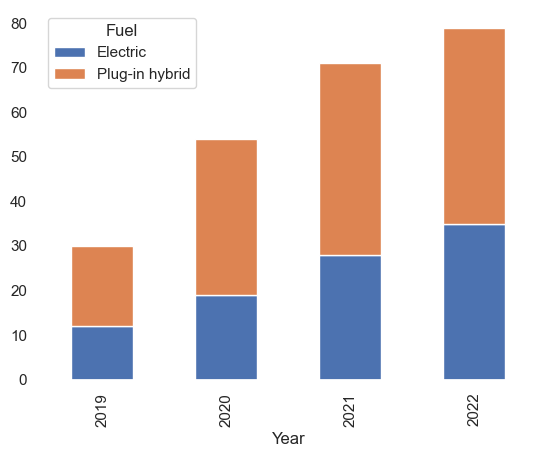

In [75]:
#plt.figure(figsize=(10,5));
#plt.title('Number of different models registered since 2019',size=14)
#sns.set(rc={'figure.facecolor':'white','axes.facecolor':'white'})
make_reg.plot(kind='bar',stacked=True);
#ax=sns.barplot(data=make_reg,x='Year',y='CountModels',hue='Fuel')

In [ ]:
#Import vehicle registration data
veh_licence=pd.read_csv('vehicle_licence_status_1994Q4_2023Q2.csv')
veh_licence.shape

(230440, 81)

In [ ]:
#We have the reference information about the vehicles in the first 5 columns and the time information afterwwards
veh_licence.head()

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2023Q3,2023Q2,2023Q1,2022Q4,...,2003Q4,2002Q4,2001Q4,2000Q4,1999Q4,1998Q4,1997Q4,1996Q4,1995Q4,1994Q4
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,16,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,4,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,26,27,25,24,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,2,1,2,3,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,987,993,988,982,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Make a copy of the file
cars_licence=veh_licence.copy()
#Filter for only liceced vehicles
cars_licence=cars_licence[cars_licence['LicenceStatus']=='Licensed']
#Drop LicenceStatus colunm
cars_licence.drop(['LicenceStatus'],axis=1,inplace=True)
#Unpivot data to have the date as rows rather than columns
cars_licence=pd.melt(cars_licence,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Licences')
#Filter for only cars
cars_licence=cars_licence[cars_licence['BodyType']=='Cars']
#Add a column for the year
cars_licence['Year']=cars_licence['YearQuarter'].astype(str).str[:4]
#Add a column for the quarter
cars_licence['Quarter']=cars_licence['YearQuarter'].astype(str).str[-2:]
#Group some of the smaller categories of fuels into Other fuel type
cars_licence.loc[cars_licence['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
#Group petrol and diesel hybrids into the same category called hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
#Group plug in petrol and diesel into the same category called Plug in hybrid
cars_licence.loc[cars_licence['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
#Show sample of the data
cars_licence.head(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Licences,Year,Quarter
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,2023Q3,16,2023,Q3
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,2023Q3,26,2023,Q3
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,2023Q3,987,2023,Q3
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,2023Q3,658,2023,Q3
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,2023Q3,60,2023,Q3
5,Cars,ABARTH,ABARTH 500,500,Petrol,2023Q3,3863,2023,Q3
6,Cars,ABARTH,ABARTH 500,500 C,Petrol,2023Q3,150,2023,Q3
7,Cars,ABARTH,ABARTH 500,500 C S-A,Petrol,2023Q3,376,2023,Q3
8,Cars,ABARTH,ABARTH 500,500 CUSTOM,Petrol,2023Q3,337,2023,Q3
9,Cars,ABARTH,ABARTH 500,500 CUSTOM S-A,Petrol,2023Q3,96,2023,Q3


In [ ]:
fuel_licence=cars_licence.copy()
fuel_licence=fuel_licence[(fuel_licence['Year'].isin(years))&(fuel_licence['Quarter']=='Q4')]
fuel_licence=fuel_licence.groupby(['Fuel','Year'])['Licences'].sum().reset_index(['Fuel','Year'])
fuel_licence=fuel_licence[~fuel_licence['Year'].isin(['2014','2023'])]
fuel_licence['Licences']=fuel_licence['Licences']/1000000
fuel_licence.head(10)

,Fuel,Year,Licences
0,Battery electric,2015,0.020472
1,Battery electric,2016,0.029086
2,Battery electric,2017,0.041222
3,Battery electric,2018,0.055338
4,Battery electric,2019,0.089581
5,Battery electric,2020,0.191596
6,Battery electric,2021,0.374597
7,Battery electric,2022,0.620632
8,Diesel,2015,11.428664
9,Diesel,2016,12.051932


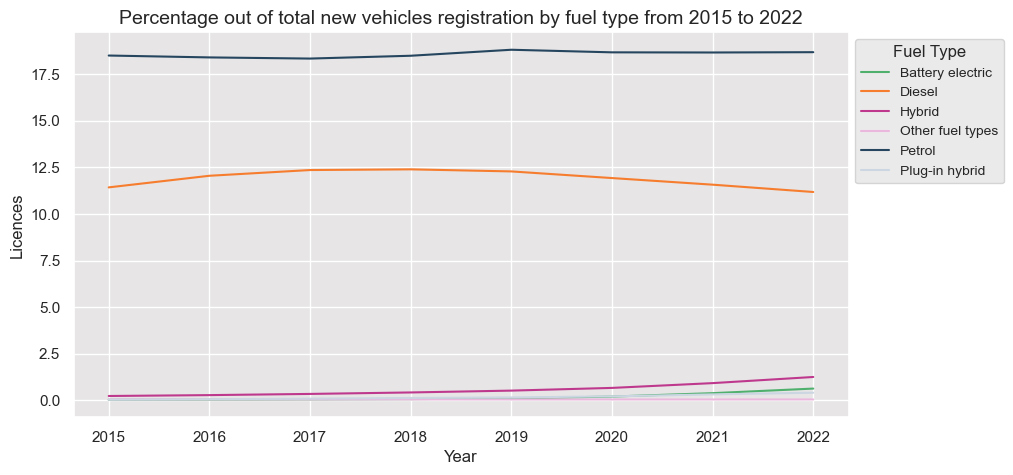

In [ ]:
plt.figure(figsize=(10,5));
plt.title('Percentage out of total new vehicles registration by fuel type from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=fuel_licence,x='Year',y='Licences',hue='Fuel',errorbar=None,hue_order=sorted(fuel_licence['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))

In [ ]:
total_chargers_raw=pd.read_csv('total_chargers_uk_jan_2023.csv')
total_uk=rapid_chargers_raw.iloc[0,:]
total_chargers_raw.head(10)

,Local Authority / Region Code,Local Authority / Region Name,Jan-23 \n(Total Charging Devices) [Note 2],"Jan-23 \n(per 100,000 population) [Note 3]",Oct-22\n(Total Charging Devices),"Oct-22\n(per 100,000 population)",July-22 \n(Total Charging Devices),"July-22 \n(per 100,000 population)",Apr-22 \n(Total Charging Devices),"Apr-22 \n(per 100,000 population)",...,Oct-20 \n(Total Charging Devices),"Oct-20 \n(per 100,000 population)",July-20 \n(Total Charging Devices),"July-20 \n(per 100,000 population)",Apr-20 \n(Total Charging Devices),"Apr-20 \n(per 100,000 population)",Jan-20 \n(Total Charging Devices),"Jan-20 \n(per 100,000 population)",Oct-19 \n(Total Charging Devices),"Oct-19 \n(per 100,000 population)"
0,K02000001,United Kingdom,"37,055",55.3,"34,637",51.6,"32,011",47.7,"30,290",45.2,...,"19,487",29.2,"18,265",27.3,"17,947",27.0,"16,505",24.8,"15,116",22.8
1,K03000001,Great Britian,"36,689",56.3,"34,295",52.6,"31,683",48.6,"29,942",45.9,...,"19,169",29.5,"17,953",27.7,"17,642",27.3,"16,210",25.1,"14,821",23.0
2,E92000001,England,"31,466",55.7,"29,774",52.7,"27,502",48.6,"25,884",45.8,...,"16,456",29.2,"15,395",27.3,"14,979",26.8,"13,719",24.5,"12,549",22.4
3,E12000001,North East,"1,253",47.3,"1,142",42.6,"1,155",43.1,"1,011",37.7,...,849,31.8,812,30.4,786,29.6,752,28.3,738,27.8
4,E06000047,County Durham,229,43.9,206,38.6,174,32.6,149,27.9,...,106,20.0,105,19.8,102,19.4,96,18.2,92,17.5
5,E06000005,Darlington,68,62.8,54,50.3,49,45.6,31,28.9,...,29,27.2,28,26.2,28,26.3,27,25.3,27,25.3
6,E06000001,Hartlepool,24,25.9,8,8.5,11,11.7,12,12.8,...,6,6.4,6,6.4,6,6.4,5,5.4,5,5.4
7,E06000002,Middlesbrough,51,35.5,33,23.4,38,26.9,34,24.1,...,29,20.6,29,20.6,29,20.6,27,19.2,25,17.8
8,E06000057,Northumberland,251,78.1,220,67.9,226,69.8,198,61.1,...,162,50.2,152,47.1,149,46.5,138,43.1,139,43.4
9,E06000003,Redcar and Cleveland,37,27.1,45,32.8,40,29.1,36,26.2,...,24,17.5,20,14.6,20,14.6,17,12.4,17,12.4


In [ ]:
regions=list(total_chargers_raw.loc[(total_chargers_raw['Local Authority / Region Code'].str.contains('E12')),
                   'Local Authority / Region Name'])
regions

['North East',
 'North West',
 'Yorkshire and the Humber',
 'East Midlands',
 'West Midlands',
 'East of England',
 'London',
 'South East',
 'South West']

In [ ]:
total_chargers=total_chargers_raw.copy()
total_chargers=total_chargers[total_chargers['Local Authority / Region Name'].isin(regions)]
total_chargers.replace(to_replace=',',value='',inplace=True,regex=True)
#rapid_chargers=rapid_chargers.replace('x',0.0)
#rapid_chargers=rapid_chargers.replace('-',0.0)
#rapid_chargers[rapid_chargers['Local Authority / Region Name'].str.contains('abolished')]
#rapid_chargers=rapid_chargers.fillna(0.0)
total_chargers

,Local Authority / Region Code,Local Authority / Region Name,Jan-23 \n(Total Charging Devices) [Note 2],"Jan-23 \n(per 100,000 population) [Note 3]",Oct-22\n(Total Charging Devices),"Oct-22\n(per 100,000 population)",July-22 \n(Total Charging Devices),"July-22 \n(per 100,000 population)",Apr-22 \n(Total Charging Devices),"Apr-22 \n(per 100,000 population)",...,Oct-20 \n(Total Charging Devices),"Oct-20 \n(per 100,000 population)",July-20 \n(Total Charging Devices),"July-20 \n(per 100,000 population)",Apr-20 \n(Total Charging Devices),"Apr-20 \n(per 100,000 population)",Jan-20 \n(Total Charging Devices),"Jan-20 \n(per 100,000 population)",Oct-19 \n(Total Charging Devices),"Oct-19 \n(per 100,000 population)"
3,E12000001,North East,1253,47.3,1142,42.6,1155,43.1,1011,37.7,...,849,31.8,812,30.4,786,29.6,752,28.3,738,27.8
17,E12000002,North West,2316,31.2,2188,29.7,2004,27.2,1883,25.6,...,1403,19.1,1476,20.1,1412,19.4,1279,17.5,1204,16.5
61,E12000003,Yorkshire and the Humber,1946,35.5,1839,33.3,1614,29.2,1514,27.4,...,996,18.1,951,17.3,900,16.4,775,14.1,664,12.1
86,E12000004,East Midlands,1903,39.0,1842,37.9,1718,35.3,1627,33.4,...,1029,21.3,962,19.9,925,19.3,862,17.9,743,15.5
134,E12000005,West Midlands,2825,47.4,2516,42.2,2156,36.2,2020,33.9,...,1141,19.2,1030,17.4,984,16.7,891,15.1,815,13.8
169,E12000006,East of England,2380,37.5,2269,36.2,2083,33.2,1887,30.1,...,1229,19.7,1119,17.9,1069,17.2,963,15.5,909,14.7
220,E12000007,London,11521,131.0,11028,122.5,10482,116.4,10020,111.3,...,5655,63.1,5151,57.5,5069,56.9,4773,53.6,4360,48.9
256,E12000008,South East,4804,51.7,4562,49.5,4057,44.0,3831,41.6,...,2649,28.9,2478,27.0,2437,26.7,2143,23.5,1966,21.5
327,E12000009,South West,2518,44.1,2388,42.2,2233,39.5,2091,36.9,...,1505,26.8,1416,25.2,1397,24.9,1281,22.9,1150,20.5


In [ ]:
col_names=list(total_chargers.columns)
col_names[2:]
total_chargers[col_names[2:]]=total_chargers[col_names[2:]].apply(pd.to_numeric)

In [ ]:
for i in list(range(2,len(col_names),2)):
    print(sum(total_chargers[col_names[i]])-(float(total_uk.str.replace(',','')[i])))

-5589.0
-4863.0
-4509.0
-4406.0
-4216.0
-4002.0
-3811.0
-3529.0
-3316.0
-3031.0
-2870.0
-2968.0
-2786.0
-2567.0


In [ ]:
dic_names={}
for col in col_names[2::8]:
    dic_names[col]='20'+col[4:6]
dic_names

col_names_pivot=col_names[0:2]+col_names[2::8]

total_charging_devices=total_chargers[col_names_pivot].rename(columns=dic_names).melt(id_vars=col_names[0:2],var_name='Year',value_name='ChargingDevices')

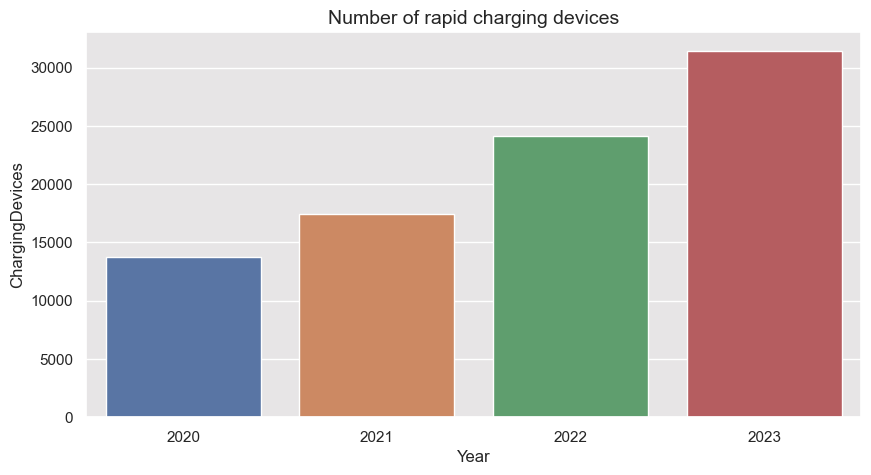

In [ ]:
data=total_charging_devices.groupby(by='Year')['ChargingDevices'].sum().to_frame().reset_index()
plt.figure(figsize=(10,5));
plt.title('Number of rapid charging devices',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data,x='Year',y='ChargingDevices')

In [ ]:
total_charging_devices.replace(['Yorkshire and the Humber','East of England'],['Yorkshire and The Humber','Eastern'],inplace=True)

In [ ]:
dic_names={}
for col in col_names[3::8]:
    dic_names[col]='20'+col[4:6]
dic_names

col_names_pivot=col_names[0:2]+col_names[3::8]

rapid_charging_density=rapid_chargers[col_names_pivot].rename(columns=dic_names).melt(id_vars=col_names[0:2],var_name='Year',value_name='RapidChargingPer100kPopulation')

In [ ]:
'''map_data = gpd.read_file('geo_regions.json')
map_data'''

"map_data = gpd.read_file('geo_regions.json')\nmap_data"

In [ ]:
'''map_data[~map_data['EER13NM'].isin(list(total_charging_devices['Local Authority / Region Name'].unique()))]'''

,id,EER13CD,EER13CDO,EER13NM,geometry


In [ ]:
'''rapid_charging_devices[(~rapid_charging_devices['Local Authority / Region Code'].isin(list(map_data['id'].unique())))&
                       (rapid_charging_devices['Local Authority / Region Code'].str.contains('E'))&
                      (rapid_charging_devices['Year']=='2023')]'''

,Local Authority / Region Code,Local Authority / Region Name,Year,RapidChargingDevices
74,E06000061,North Northamptonshire (from April 2021),2023,23.0
77,E06000062,West Northamptonshire (from April 2021),2023,57.0
185,E07000244,East Suffolk,2023,10.0
188,E07000245,West Suffolk,2023,33.0
234,E06000060,Buckinghamshire,2023,41.0
287,E06000058,"Bournemouth, Christchurch and Poole",2023,48.0
290,E06000059,Dorset,2023,34.0
314,E07000246,Somerset West and Taunton,2023,11.0


In [ ]:
'''total_chargers_2023=total_charging_devices[total_charging_devices['Year']=='2023'].drop('Year',axis=1)
total_chargers_2023'''

,Local Authority / Region Code,Local Authority / Region Name,ChargingDevices
0,E12000001,North East,1253
1,E12000002,North West,2316
2,E12000003,Yorkshire and The Humber,1946
3,E12000004,East Midlands,1903
4,E12000005,West Midlands,2825
5,E12000006,Eastern,2380
6,E12000007,London,11521
7,E12000008,South East,4804
8,E12000009,South West,2518


In [ ]:
'''geo_total_chargers=map_data.merge(total_chargers_2023,left_on='EER13NM',right_on='Local Authority / Region Name',how='left')
geo_total_chargers.drop(['Local Authority / Region Code','Local Authority / Region Name'],axis=1,inplace=True)
geo_total_chargers'''

,id,EER13CD,EER13CDO,EER13NM,geometry,ChargingDevices
0,E15000001,E15000001,01,North East,"MULTIPOLYGON (((-1.22526 54.62585, -1.22444 54...",1253
1,E15000002,E15000002,02,North West,"MULTIPOLYGON (((-3.20537 53.37165, -3.20373 53...",2316
2,E15000003,E15000003,03,Yorkshire and The Humber,"MULTIPOLYGON (((-0.55349 53.69040, -0.54613 53...",1946
3,E15000004,E15000004,04,East Midlands,"MULTIPOLYGON (((0.26883 52.81561, 0.26392 52.8...",1903
4,E15000005,E15000005,05,West Midlands,"POLYGON ((-1.81356 53.13258, -1.81356 53.13318...",2825
5,E15000006,E15000006,06,Eastern,"MULTIPOLYGON (((0.54048 51.51740, 0.53966 51.5...",2380
6,E15000007,E15000007,07,London,"MULTIPOLYGON (((-0.32111 51.44603, -0.32520 51...",11521
7,E15000008,E15000008,08,South East,"MULTIPOLYGON (((-1.58855 50.66283, -1.58937 50...",4804
8,E15000009,E15000009,09,South West,"MULTIPOLYGON (((-6.39892 49.86534, -6.39892 49...",2518


<Axes: >

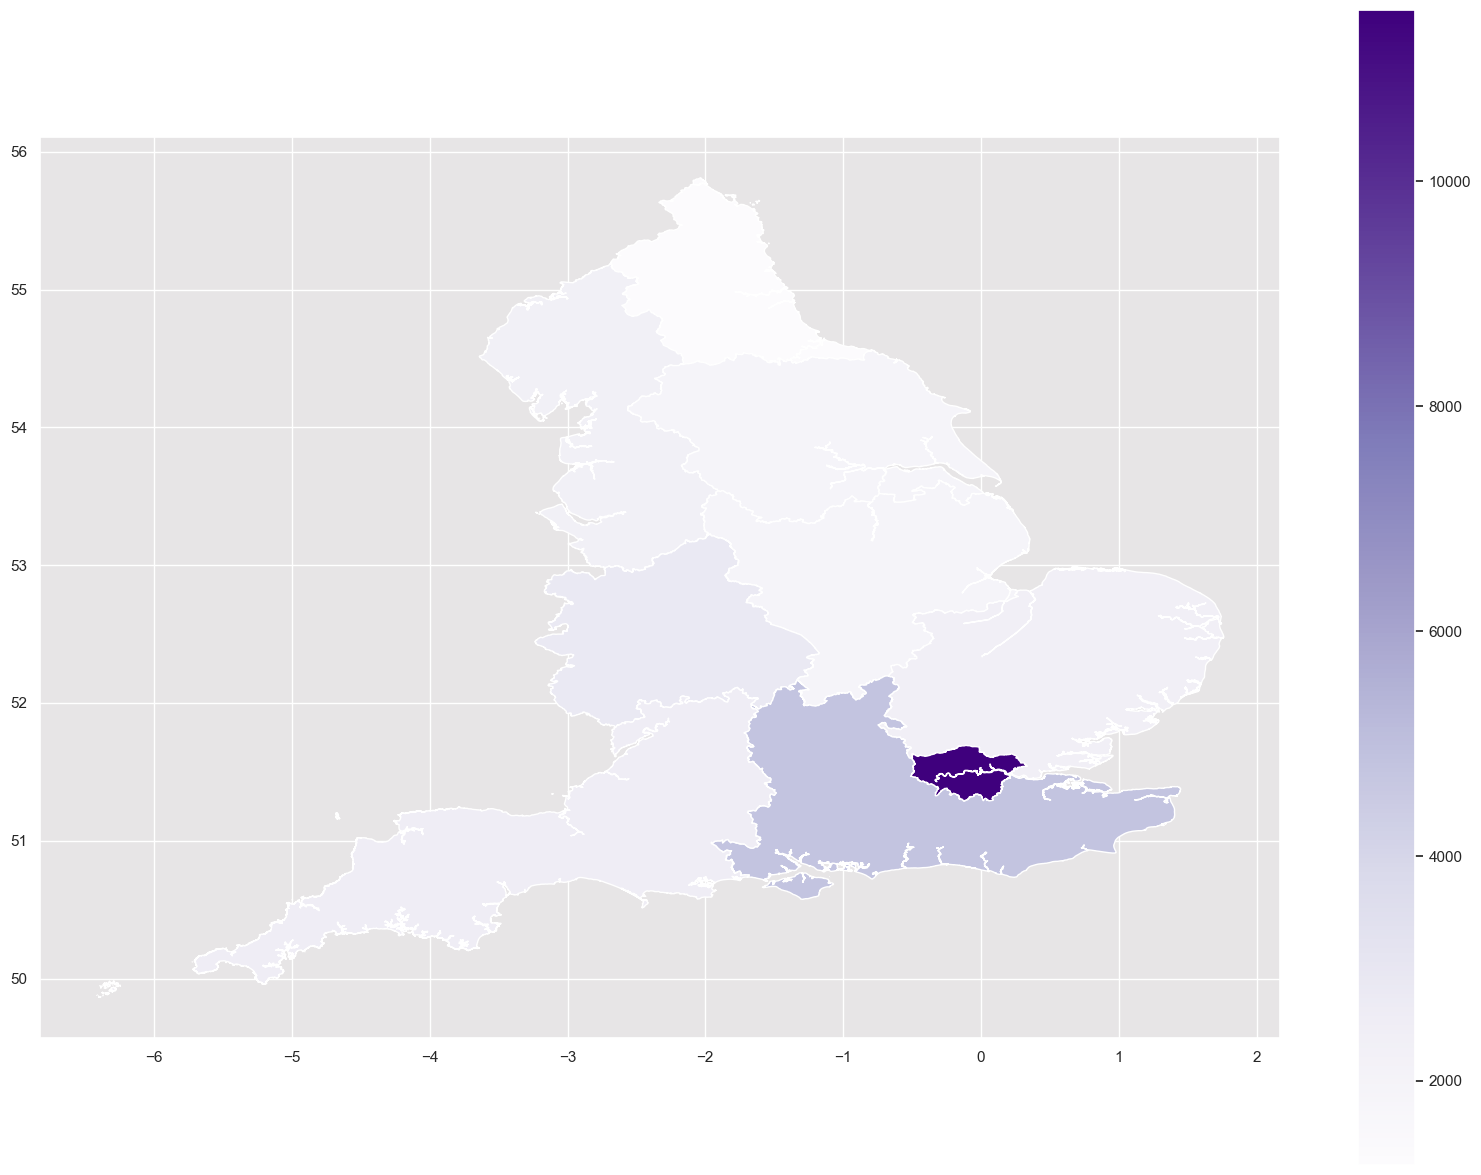

In [ ]:
'''geo_total_chargers.plot(column='ChargingDevices',figsize=(20,15),cmap='Purples',legend=True)'''

# Graveyard
## Sample code to be deleted at the end

In [ ]:
quarter_change=cars_data.groupby(['Fuel','YearQuarter'])['Registration'].sum().reset_index(['Fuel','YearQuarter'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'QoQ']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['QoQ']=quarter_change['QoQ']*100/quarter_change['Registration']
quarters=sorted(quarter_change['YearQuarter'].unique())
quarter_change=quarter_change[quarter_change['YearQuarter'].isin(quarters[-14:])]
 #   for quarter in quarters:

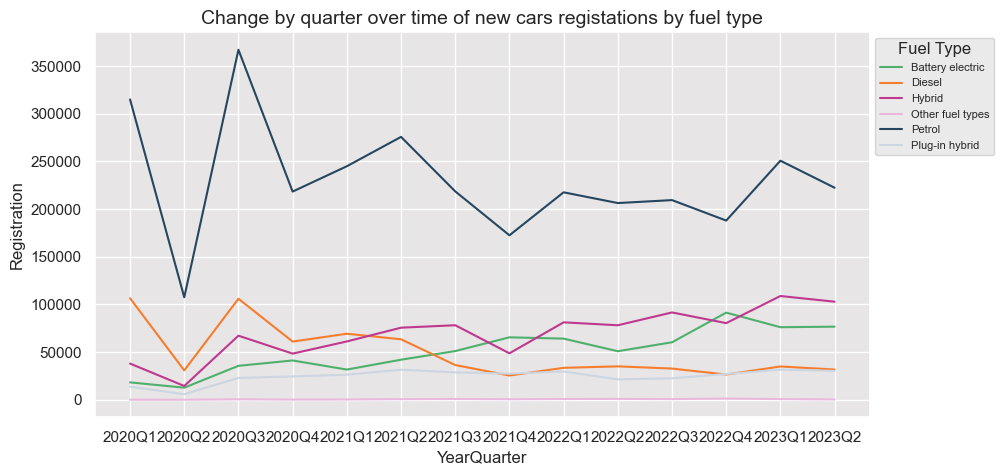

In [ ]:
plt.figure(figsize=(10,5));
plt.title('Change by quarter over time of new cars registations by fuel type',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=quarter_change,x='YearQuarter',y='Registration',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=8, bbox_to_anchor=(1, 1))

In [ ]:
make_reg_index=make_reg.pivot(index='Fuel',columns='Year',values='CountModels')
make_reg_index=make_reg_index[['2020','2021','2022']].divide(make_reg_index['2019'],axis=0).multiply(100).reset_index()
make_reg_index=make_reg_index.melt(id_vars=['Fuel'],var_name='Year',value_name='Index2019')
make_reg_index

,Fuel,Year,Index2019
0,Battery electric,2020,158.333333
1,Hybrid,2020,161.111111
2,Plug-in hybrid,2020,194.444444
3,Battery electric,2021,233.333333
4,Hybrid,2021,186.111111
5,Plug-in hybrid,2021,238.888889
6,Battery electric,2022,291.666667
7,Hybrid,2022,244.444444
8,Plug-in hybrid,2022,244.444444


In [ ]:
with open("geo_regions.json") as json_file:
    england_geo_regions = json.load(json_file)
    print(england_geo_regions)
